In [2]:
!pip install yfinance

In [3]:
import yfinance as yf  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

In [4]:
def get_ticker_data(ticker, start, end, interval):
    
    # import libaries
    import yfinance as yf  
    import matplotlib.pyplot as plt
    import pandas as pd
    
    # download data using yfinance libary
    df = yf.download(tickers=ticker,start=start,end=end,interval=interval)
    
    # add in column showing price % change from start date 
    df['Percent_Change'] = [(df['Close'][i] - df['Open'][i]) / df['Open'][i] * 100 for i in range(len(df['Open']))]
    df['Change_Close_Less_Open'] = [df['Close'][i] - df['Open'][i] for i in range(len(df['Open']))]
    return df

In [5]:
df_doge = get_ticker_data(ticker='DOGE-USD',start='2020-01-01',end='2021-04-30',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [39]:
df_moon = pd.read_csv('safemoon_prices.csv')

In [40]:
df_moon.tail()

,Time,Open,High,Low,Close,Volume
57,1615593600,2.000000e-08,5.000000e-08,2.000000e-08,5.000000e-08,6093641.00
58,1615507200,0.000000e+00,3.000000e-08,0.000000e+00,2.000000e-08,3057863.50
59,1615420800,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,447678.94
60,1615334400,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,228052.45
61,1615248000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,151171.25


In [41]:
df_moon["Time"] = pd.to_datetime(df_moon["Time"],unit='s')
df_moon = df_moon[df_moon['Open'] != 0]
df_moon['Percent_Change'] = [(df_moon['Close'][i] - df_moon['Open'][i]) / df_moon['Open'][i] * 100 for i in range(len(df_moon['Open']))]
df_moon['Change_Close_Less_Open'] = [df_moon['Close'][i] - df_moon['Open'][i] for i in range(len(df_moon['Open']))]
df_moon.set_index('Time', inplace=True)
df_moon.head()

,Open,High,Low,Close,Volume,Percent_Change,Change_Close_Less_Open
Time,,,,,,,
2021-05-14,0.000008,0.000009,0.000008,0.000008,35358068.0,8.949416,6.900000e-07
2021-05-13,0.000008,0.000009,0.000007,0.000008,157373728.0,-3.544304,-2.800000e-07
2021-05-12,0.000009,0.000010,0.000008,0.000008,121493320.0,-12.460064,-1.170000e-06
2021-05-11,0.000010,0.000011,0.000008,0.000010,198643664.0,3.005181,2.900000e-07
2021-05-10,0.000009,0.000010,0.000007,0.000009,194685024.0,5.017104,4.400000e-07


In [21]:
df_reddit_moon = pd.read_csv('reddit_pmaw_output_SafeMoon_subreddit.1.1.21-4.30.21.csv')

df_reddit_moon.head()

C:\Users\T\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (70,71,83,86) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,all_awardings,allow_live_comments,author,author_flair_background_color,author_flair_css_class,author_flair_text,author_flair_text_color,awarders,can_mod_post,contest_mode,...,author_flair_template_id,author_cakeday,poll_data,banned_by,edited,distinguished,gilded,event_end,event_is_live,event_start
0,[],False,[deleted],NaN,NaN,NaN,dark,[],False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Jennris,NaN,NaN,NaN,NaN,[],False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,dowseman,NaN,NaN,NaN,NaN,[],False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,basiics1,NaN,NaN,NaN,NaN,[],False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,hogemahdik,NaN,NaN,NaN,NaN,[],False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_reddit_moon = df_reddit_moon[['subreddit', 'created_utc', 'subreddit_subscribers', 'num_comments']]

df_reddit_moon.head()

,subreddit,created_utc,subreddit_subscribers,num_comments
0,SafeMoon,1615654797,1466,6
1,SafeMoon,1615654713,1461,7
2,SafeMoon,1615654708,1461,6
3,SafeMoon,1615654432,1453,3
4,SafeMoon,1615654410,1451,7


In [23]:
# remove bad rows

df_reddit_moon = df_reddit_moon[df_reddit_moon['subreddit'] == 'SafeMoon']

df_reddit_moon.head()

,subreddit,created_utc,subreddit_subscribers,num_comments
0,SafeMoon,1615654797,1466,6
1,SafeMoon,1615654713,1461,7
2,SafeMoon,1615654708,1461,6
3,SafeMoon,1615654432,1453,3
4,SafeMoon,1615654410,1451,7


In [24]:
# check value in subreddit column

df_reddit_moon['subreddit'].value_counts()

SafeMoon    66941
Name: subreddit, dtype: int64

In [25]:
# convert epoch time to datetime and date

df_reddit_moon["created_utc"] = pd.to_datetime(df_reddit_moon["created_utc"],unit='s')
df_reddit_moon["created_date_utc"] = df_reddit_moon["created_utc"].dt.date

df_reddit_moon.head()


,subreddit,created_utc,subreddit_subscribers,num_comments,created_date_utc
0,SafeMoon,2021-03-13 16:59:57,1466,6,2021-03-13
1,SafeMoon,2021-03-13 16:58:33,1461,7,2021-03-13
2,SafeMoon,2021-03-13 16:58:28,1461,6,2021-03-13
3,SafeMoon,2021-03-13 16:53:52,1453,3,2021-03-13
4,SafeMoon,2021-03-13 16:53:30,1451,7,2021-03-13


In [26]:
# sum rows by date, sum comments by date, and average subscribers by date

moon_comments_sum = df_reddit_moon.groupby('created_date_utc').sum()['num_comments']
moon_subscribers_avg = df_reddit_moon.groupby('created_date_utc').mean()['subreddit_subscribers']
moon_submission_count = df_reddit_moon.groupby('created_date_utc').count()['subreddit']


df_reddit_moon_summary = pd.DataFrame({'submissions': moon_submission_count, 
                                       'comments': moon_comments_sum, 
                                       'subscribers': moon_subscribers_avg
                                      })

df_reddit_moon_summary.head()

,submissions,comments,subscribers
created_date_utc,,,
2021-03-08,1,1,37.000000
2021-03-09,2,30,48.000000
2021-03-10,7,34,66.285714
2021-03-11,11,67,104.545455
2021-03-12,109,1082,323.853211


In [42]:
df_combined_prices = df_moon.join(df_doge, how='inner', lsuffix='_moon', rsuffix='_doge')

df_combined_prices.head()

,Open_moon,High_moon,Low_moon,Close_moon,Volume_moon,Percent_Change_moon,Change_Close_Less_Open_moon,Open_doge,High_doge,Low_doge,Close_doge,Adj Close,Volume_doge,Percent_Change_doge,Change_Close_Less_Open_doge
2021-04-30,0.000005,0.000006,0.000005,0.000005,29282326.0,7.186858,3.500000e-07,0.304702,0.339757,0.302981,0.337561,0.337561,5290390982,10.783978,0.032859
2021-04-29,0.000005,0.000006,0.000004,0.000005,30755116.0,3.073770,1.500000e-07,0.323232,0.323881,0.296904,0.305169,0.305169,5027354503,-5.588249,-0.018063
2021-04-28,0.000005,0.000006,0.000005,0.000005,25282112.0,3.711340,1.800000e-07,0.272273,0.344662,0.256231,0.323682,0.323682,14464343767,18.881419,0.051409
2021-04-27,0.000005,0.000006,0.000004,0.000005,50714316.0,-0.746269,-4.000000e-08,0.271427,0.279629,0.264928,0.272188,0.272188,3590611310,0.280371,0.000761
2021-04-26,0.000006,0.000007,0.000005,0.000006,37408716.0,-11.164274,-7.000000e-07,0.251240,0.280452,0.248026,0.270674,0.270674,5118886527,7.735236,0.019434


The correlation is 0.1 with R-square value of 0.011
Regression Line: y = 0.0x + 0.0; r^2 = 0.011


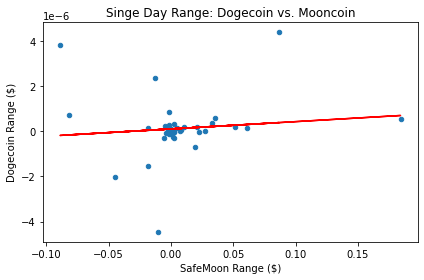

In [45]:
import scipy.stats as st

# Calculate the correlation coefficient and linear regression model 

doge = df_combined_prices['Change_Close_Less_Open_doge']
moon = df_combined_prices['Change_Close_Less_Open_moon']

# calculate and plot the regression line on the scatter plot

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(doge, moon)
regress_values = doge * slope + intercept
regress_eq = (f'y = {str(round(slope, 3))}x + {str(round(intercept, 3))}; r^2 = {round(rvalue**2,3)}')

# format plot
fig, ax = plt.subplots()
df_combined_prices.plot(kind='scatter', 
                 ax=ax, 
                 x='Change_Close_Less_Open_doge', 
                 y='Change_Close_Less_Open_moon'
                )

# plot trend linear regression line and annotate

ax.plot(doge, regress_values, color = 'r')

ax.set(title='Singe Day Range: Dogecoin vs. Mooncoin',
       xlabel = 'SafeMoon Range ($)',
       ylabel = 'Dogecoin Range ($)'
       )

fig.tight_layout();

# calculate and print the correlation

correlation = st.pearsonr(doge, moon)

print(f'''The correlation is {round(correlation[0], 2)} with R-square value of {round(rvalue**2,3)}
Regression Line: {regress_eq}''')

The correlation is 0.12.
Regression Line: y = 0.284x + 18.064; r^2 = 0.014


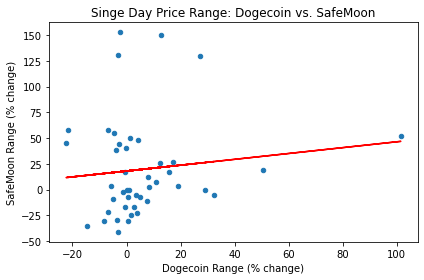

In [46]:
import scipy.stats as st

# Calculate the correlation coefficient and linear regression model 

doge = df_combined_prices['Percent_Change_doge']
moon = df_combined_prices['Percent_Change_moon']

# calculate and plot the regression line on the scatter plot

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(doge, moon)
regress_values = doge * slope + intercept
regress_eq = (f'y = {str(round(slope, 3))}x + {str(round(intercept, 3))}; r^2 = {round(rvalue**2,3)}')

# format plot
fig, ax = plt.subplots()
df_combined_prices.plot(kind='scatter', 
                             ax=ax, 
                             x='Percent_Change_doge', 
                             y='Percent_Change_moon'
                            )

# plot trend linear regression line and annotate

ax.plot(doge, regress_values, color = 'r')
#ax.annotate(regress_eq, (10,-30), color = 'r', fontsize=11)

ax.set(title='Singe Day Price Range: Dogecoin vs. SafeMoon',
       xlabel = 'Dogecoin Range (% change)',
       ylabel = 'SafeMoon Range (% change)'
       )

fig.tight_layout();

# calculate and print the correlation

correlation = st.pearsonr(doge, moon)

print(f'''The correlation is {round(correlation[0], 2)}.
Regression Line: {regress_eq}''')

In [119]:
df_moon_price_reddit = df_moon.join(df_reddit_moon_summary, how='inner')

df_moon_price_reddit['submissions'].head()

2021-04-30     318
2021-04-29    1659
2021-04-28    1762
2021-04-27    2584
2021-04-26    2282
Name: submissions, dtype: int64

The correlation is -0.03 with R-square value of 0.001
Regression Line: y = -0.0x + 20.783; r^2 = 0.001


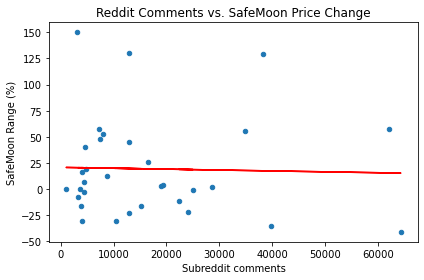

In [50]:
import scipy.stats as st

# Calculate the correlation coefficient and linear regression model 

comments = df_moon_price_reddit['comments']
moon = df_moon_price_reddit['Percent_Change']

# calculate and plot the regression line on the scatter plot

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(comments, moon)
regress_values = comments * slope + intercept
regress_eq = (f'y = {str(round(slope, 3))}x + {str(round(intercept, 3))}; r^2 = {round(rvalue**2,3)}')

# format plot
fig, ax = plt.subplots()
df_moon_price_reddit.plot(kind='scatter', 
                 ax=ax, 
                 x='comments', 
                 y='Percent_Change'
                )

# plot trend linear regression line and annotate

ax.plot(comments, regress_values, color = 'r')

ax.set(title='Reddit Comments vs. SafeMoon Price Change',
       xlabel = 'Subreddit comments',
       ylabel = 'SafeMoon Range (%)'
       )

fig.tight_layout();

# calculate and print the correlation

correlation = st.pearsonr(comments, moon)

print(f'''The correlation is {round(correlation[0], 2)} with R-square value of {round(rvalue**2,3)}
Regression Line: {regress_eq}''')

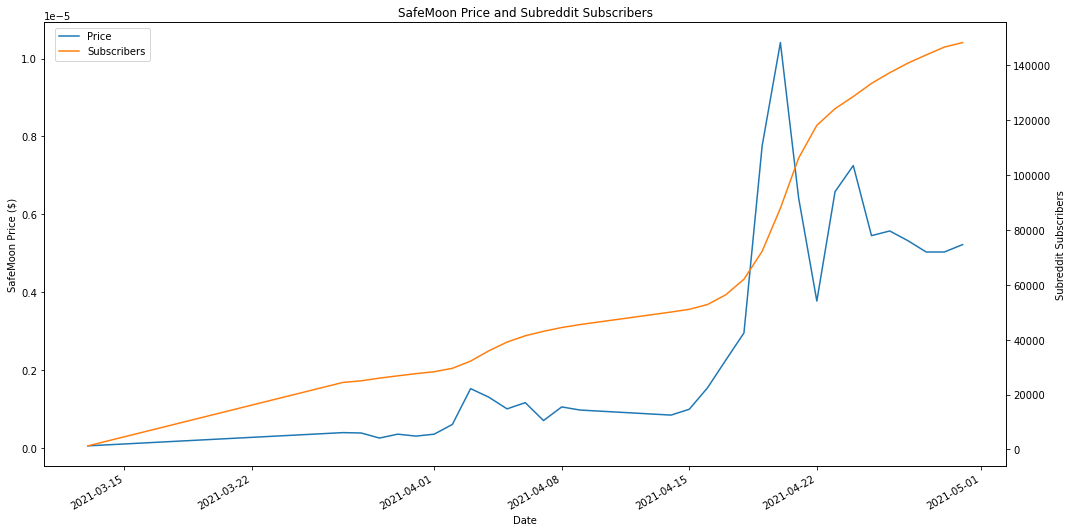

In [117]:
fig, ax = plt.subplots(figsize=(15,7.5))
ax1 = df_moon_price_reddit['Close'].plot(ax=ax, legend=False, label='Price', logy=False)
ax2 = df_moon_price_reddit['subscribers'].plot(ax=ax, secondary_y=True, legend=False, label='Subscribers', logy=False)
ax.set(title='SafeMoon Price and Subreddit Subscribers',
       xlabel = 'Date'
       )
ax1.set_ylabel('SafeMoon Price ($)')
ax2.set_ylabel('Subreddit Subscribers')

fig.legend(loc='upper left', bbox_to_anchor=(.05, .95))

fig.tight_layout();

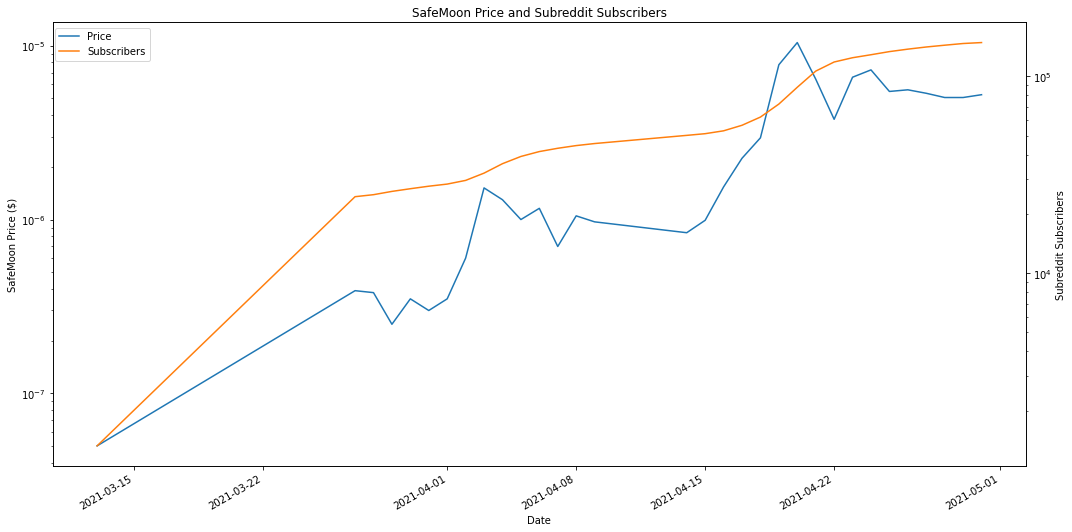

In [118]:
fig, ax = plt.subplots(figsize=(15,7.5))
ax1 = df_moon_price_reddit['Close'].plot(ax=ax, legend=False, label='Price', logy=True)
ax2 = df_moon_price_reddit['subscribers'].plot(ax=ax, secondary_y=True, legend=False, label='Subscribers', logy=True)
ax.set(title='SafeMoon Price and Subreddit Subscribers',
       xlabel = 'Date'
       )
ax1.set_ylabel('SafeMoon Price ($)')
ax2.set_ylabel('Subreddit Subscribers')
fig.legend(loc='upper left', bbox_to_anchor=(.05, .95))

fig.tight_layout();